In [1]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt 
import string
import os
from PIL import Image
import glob
from pickle import dump, load
from tqdm import tqdm_notebook as tqdm
from time import time
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
import h5py
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras import Input, layers
from keras import optimizers
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
try:
    import dill as pickle
except ImportError:
    import pickle

# Loading Caption Generator Model

In [3]:
model = load(open('C:/Flickr8k_urdu_17july/model_weights/Caption_generator_Model.pkl', 'rb'))

C:\Users\HP\anaconda3\envs\python_36\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [4]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 35, 300)      643500      input_2[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2048)         0           input_1[0][0]                    
____________________________________________________________________________________________

In [5]:
images = 'C:/Flickr8k_urdu_17july/Flicker8k_Dataset/'

In [6]:
with open("C:/Flickr8k_urdu_17july/encoded_test_images_17july.pkl", "rb") as encoded_pickle:
    encoding_test = load(encoded_pickle)

In [7]:
# Loading wordtoix
wordtoix = load(open("C:/Flickr8k_urdu_17july/wordtoix_17july.pkl", "rb"))
print('Wordtoix Length = %d' % len(wordtoix))

Wordtoix Length = 2144


In [8]:
ixtoword = {}
for word, i in wordtoix.items():
    ixtoword[i] = word

In [9]:
Directory_path = "C:/Flickr8k_urdu_17july/Flicker8k_Dataset/"

In [10]:
def greedySearch(photo):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

In [11]:
max_length = 35

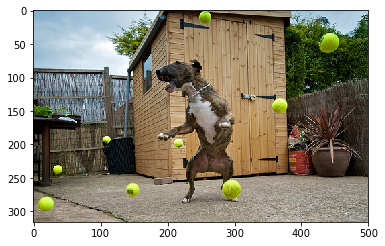

Greedy: ایک کتا منہ میں ٹینس بال کے ساتھ کھیل رہا ہے
The BLEU Score is: 0.3672056269893592


In [32]:
import linecache
import nltk
import nltk.translate.bleu_score as bleu
import math
import numpy
import os
import array
import matplotlib.pyplot as plt
import numpy as np
# !pip install tensorflow-estimator==2.1.0
z =999
pic = list(encoding_test.keys())[z]
image = encoding_test[pic].reshape((1,2048))
x=plt.imread(Directory_path+pic)
plt.imshow(x)
plt.show()
print("Greedy:",greedySearch(image))
lu=1
z2=((z-1)*5)+1;
particular_line2 = linecache.getline('C:/Flickr8k_urdu_17july/descriptions_urdu_17july.txt',z2)
len2=len(particular_line2)
l2= linecache.getline('C:/Flickr8k_urdu_17july/descriptions_urdu_17july.txt', z2+1)
l3= linecache.getline('C:/Flickr8k_urdu_17july/descriptions_urdu_17july.txt', z2+2)
l4=linecache.getline('C:/Flickr8k_urdu_17july/descriptions_urdu_17july.txt', z2+3)
l5=linecache.getline('C:/Flickr8k_urdu_17july/descriptions_urdu_17july.txt', z2+4)
Ysr_Merged = ' -1-' + l2[:-1] + ' -2-' + l3[:-1] + '-3- ' + l4[:-1] + ' -4-' + l5[:-1]
hyp = str(particular_line2).split()
l2_ref = l2.split()
l3_ref = l3.split()
l4_ref = l4.split()
l5_ref = l5.split()
l2_score_ref=bleu.sentence_bleu([l2_ref], hyp)
l3_score_ref = bleu.sentence_bleu([l3_ref], hyp)
l4_score_ref = bleu.sentence_bleu([l4_ref], hyp)
l5_score_ref = bleu.sentence_bleu([l5_ref], hyp)
y_ref = bleu.sentence_bleu([l2_ref, l3_ref, l4_ref, l5_ref], hyp)
print("The BLEU Score is: {}".format(y_ref))


In [12]:
image

array([[0.89767206, 0.7431279 , 0.45406505, ..., 0.51903164, 1.085984  ,
        1.1230618 ]], dtype=float32)

ERROR! Session/line number was not unique in database. History logging moved to new session 361


In [34]:
import linecache
import nltk
import nltk.translate.bleu_score as bleu
import math
import numpy
import os
import array
import matplotlib.pyplot as plt
import numpy as np
All_Dataset_BLEU=0.0;
# !pip install tensorflow-estimator==2.1.0
for z in range(0,999):
    #z =20
    print(str(z))
    pic = list(encoding_test.keys())[z]
    image = encoding_test[pic].reshape((1,2048))
    #x=plt.imread(Directory_path+pic)
    #plt.imshow(x)
    #plt.show()
    #print("Greedy:",greedySearch(image))
    lu=1
    z2=((z-1)*5)+1;
    particular_line2 = linecache.getline('C:/Flickr8k_urdu_17july/descriptions_urdu_17july.txt',z2)
    len2=len(particular_line2)
    l2= linecache.getline('C:/Flickr8k_urdu_17july/descriptions_urdu_17july.txt', z2+1)
    l3= linecache.getline('C:/Flickr8k_urdu_17july/descriptions_urdu_17july.txt', z2+2)
    l4=linecache.getline('C:/Flickr8k_urdu_17july/descriptions_urdu_17july.txt', z2+3)
    l5=linecache.getline('C:/Flickr8k_urdu_17july/descriptions_urdu_17july.txt', z2+4)
    Ysr_Merged = ' -1-' + l2[:-1] + ' -2-' + l3[:-1] + '-3- ' + l4[:-1] + ' -4-' + l5[:-1]
    hyp = str(particular_line2).split()
    l2_ref = l2.split()
    l3_ref = l3.split()
    l4_ref = l4.split()
    l5_ref = l5.split()
    l2_score_ref=bleu.sentence_bleu([l2_ref], hyp)
    l3_score_ref = bleu.sentence_bleu([l3_ref], hyp)
    l4_score_ref = bleu.sentence_bleu([l4_ref], hyp)
    l5_score_ref = bleu.sentence_bleu([l5_ref], hyp)
    y_ref = bleu.sentence_bleu([l2_ref, l3_ref, l4_ref, l5_ref], hyp)
    print("The BLEU Score is: {}".format(y_ref))
    All_Dataset_BLEU=All_Dataset_BLEU+y_ref

All_Dataset_BLEU=All_Dataset_BLEU/(z+1);
print('last z value = '+ str(z))
print("The Average BLEU Score is: ---> {}".format(All_Dataset_BLEU))


0
The BLEU Score is: 0
1
The BLEU Score is: 0.2102369368326755
2
The BLEU Score is: 0.4883499409416459
3
The BLEU Score is: 0.40388210275244557
4
The BLEU Score is: 0.42818185319516083
5
The BLEU Score is: 0.23462350320528
6
The BLEU Score is: 0.6493358309501979
7
The BLEU Score is: 0.40521277664616695
8
The BLEU Score is: 0.3761370954911621
9
The BLEU Score is: 0.4063798282013443
10
The BLEU Score is: 0.6389431042462724
11
The BLEU Score is: 0.36964463979752843
12
The BLEU Score is: 0.30797696508076305
13
The BLEU Score is: 0.42610827239170174
14
The BLEU Score is: 0.24072001290661232
15
The BLEU Score is: 0.5442191092561398
16
The BLEU Score is: 0.43303913492362117
17
The BLEU Score is: 0.1992410234131383
18
The BLEU Score is: 0.3486633544996752
19
The BLEU Score is: 0.6389431042462724
20
The BLEU Score is: 0.8091067115702212
21
The BLEU Score is: 0.2676032275663791
22
The BLEU Score is: 0.4111336169005197
23
The BLEU Score is: 0.2059018817845789
24
The BLEU Score is: 0.4172261448611

The BLEU Score is: 0.3740548510898886
417
The BLEU Score is: 0.33180774028439425
418
The BLEU Score is: 0.5988059642324198
419
The BLEU Score is: 0.7400828044922853
420
The BLEU Score is: 0.547332024239071
421
The BLEU Score is: 0.43655826702626327
422
The BLEU Score is: 0.5555238068023582
423
The BLEU Score is: 0.4913270548144421
424
The BLEU Score is: 0.17213315536347637
425
The BLEU Score is: 0.161692143534558
426
The BLEU Score is: 0.34172334076593075
427
The BLEU Score is: 0.29945160623183903
428
The BLEU Score is: 0.32372956394183194
429
The BLEU Score is: 0.5491004867761125
430
The BLEU Score is: 0.36105260209445084
431
The BLEU Score is: 0.5814307369682193
432
The BLEU Score is: 0.4063798282013443
433
The BLEU Score is: 0.3945881255591767
434
The BLEU Score is: 0.8132882808488929
435
The BLEU Score is: 0.5193071778680676
436
The BLEU Score is: 0.2797821230630072
437
The BLEU Score is: 0.34315019159021515
438
The BLEU Score is: 0.3200286101270289
439
The BLEU Score is: 0.1808521

The BLEU Score is: 0.30289764018096393
755
The BLEU Score is: 0.46595384151899627
756
The BLEU Score is: 0.2785525647569536
757
The BLEU Score is: 0.2925612730731506
758
The BLEU Score is: 0.5303624596095554
759
The BLEU Score is: 0.5127942962306979
760
The BLEU Score is: 0.43748114312246444
761
The BLEU Score is: 0.25400289715190977
762
The BLEU Score is: 0.388612820590649
763
The BLEU Score is: 0.22401521369401356
764
The BLEU Score is: 0.4592064719908953
765
The BLEU Score is: 0.37709297891717664
766
The BLEU Score is: 0.4924790605054523
767
The BLEU Score is: 0.5019724248795792
768
The BLEU Score is: 0.39281465090051304
769
The BLEU Score is: 0.404727200247809
770
The BLEU Score is: 0.20687381245863395
771
The BLEU Score is: 0.5303624596095554
772
The BLEU Score is: 0.6360188027707556
773
The BLEU Score is: 0.44082318755867267
774
The BLEU Score is: 0.33267026758132323
775
The BLEU Score is: 0.5590922042119968
776
The BLEU Score is: 0.3880684294761699
777
The BLEU Score is: 0.34078

In [46]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
IMG_WIDTH=299
IMG_HEIGHT=299
IMG_DIM = (IMG_WIDTH, IMG_HEIGHT)
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH,3))
output = restnet.layers[-1].output
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input, output=output)
#for layer in restnet.layers:
#    layer.trainable = False
restnet.summary()
model_new = Model(restnet.input, restnet.layers[-2].output)
model_new.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 150, 150, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

C:\Users\HP\anaconda3\envs\python_36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(Tensor("in..., outputs=Tensor("fl...)`
  # Remove the CWD from sys.path while we load stuff.


In [44]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
input_shape=(IMG_HEIGHT,IMG_WIDTH,3)
model = Sequential()
model.add(restnet)
model.add(Dense(2048, activation='relu', input_dim=input_shape))
#model.add(Dropout(0.3))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.3))
#model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
#model.compile(loss='binary_crossentropy',
 #             optimizer=optimizers.RMSprop(lr=2e-5),
  #            metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_3 (Model)              (None, 204800)            23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              419432448 
Total params: 443,020,160
Trainable params: 419,432,448
Non-trainable params: 23,587,712
_________________________________________________________________


In [41]:
model_new = Model(model.input, model.layers[-2].output)
model_new.summary()

AttributeError: Layer model_1 has multiple inbound nodes, hence the notion of "layer output" is ill-defined. Use `get_output_at(node_index)` instead.